MNIST dataset
each pixel one row create a grey scal image 28 * 28 =  784 columns
SOURCE : https://www.kaggle.com/code/maharshipandya/mnist-using-knn-97#Section-1---Reading-the-data

In [129]:
import time
from sklearnex import patch_sklearn
patch_sklearn()
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
%matplotlib inline  

# Set font sizes
SMALL_SIZE = 8
num_samples = 1500
MEDIUM_SIZE = 10
BIGGER_SIZE = 12
plt.rcParams['figure.dpi'] = 600
plt.style.use(['science','ieee','bright'])
plt.rcParams['font.size'] = MEDIUM_SIZE
current_font_size = plt.rcParams['font.size']
print("Current font size:", current_font_size)
random_state = 2024
np.random.seed(random_state)

def plot_feature_importance_comparison(models, X_test, y_test, colors, X_train, y_train):

    # Dictionary to store feature importance results
    fi_results = {}

    for model_name, model in models.items():
        fi = permutation_importance(model, X_test, y_test, n_repeats=20, random_state=random_state, n_jobs=-1)
        fi_results[model_name] = fi.importances_mean

    # Extract feature names
    feature_names = list(X_test.columns)

    # Create a DataFrame for feature importance results
    importance_df = pd.DataFrame(fi_results, index=feature_names)

    kf = KFold(n_splits=5, shuffle=True, random_state=random_state)

    # Define a function to calculate accuracy
    def accuracy(y_true, y_pred):
        return accuracy_score(y_true, y_pred)

    # Create a scorer using the accuracy function
    accuracy_scorer = make_scorer(accuracy)

    mean_accuracy = {}
    model_names = []
    training_times = []
    for model_name, model in models.items():
        # Measure training time
        start_time = time.time()
        cross_val_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring=accuracy_scorer)
        end_time = time.time()
        training_time = end_time - start_time
        
        # Store training time
        training_times.append(training_time)
        
        mean_accuracy[model_name] = np.mean(cross_val_scores)
        model_names.append(model_name)
    return importance_df, mean_accuracy, training_times


Current font size: 10.0


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [86]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split

mnist_train = pd.read_csv("./datasets/mnist_train.csv")
mnist_test = pd.read_csv("./datasets/mnist_test.csv")
mnist_train_subset = mnist_train.sample(n=10000, random_state=42)  # You can change the random_state if needed
y = mnist_train_subset["label"].copy()
X = mnist_train_subset.drop(columns=["label"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display(X_train.shape)
# mnist_train = pd.read_csv("./datasets/mnist_train.csv")
# mnist_test = pd.read_csv("./datasets/mnist_test.csv")

# y_train = mnist_train["label"].copy()
# X_train = mnist_train.drop(columns=["label"])

# y_test = mnist_test["label"].copy()
# X_test = mnist_test.drop(columns=["label"])

(8000, 784)

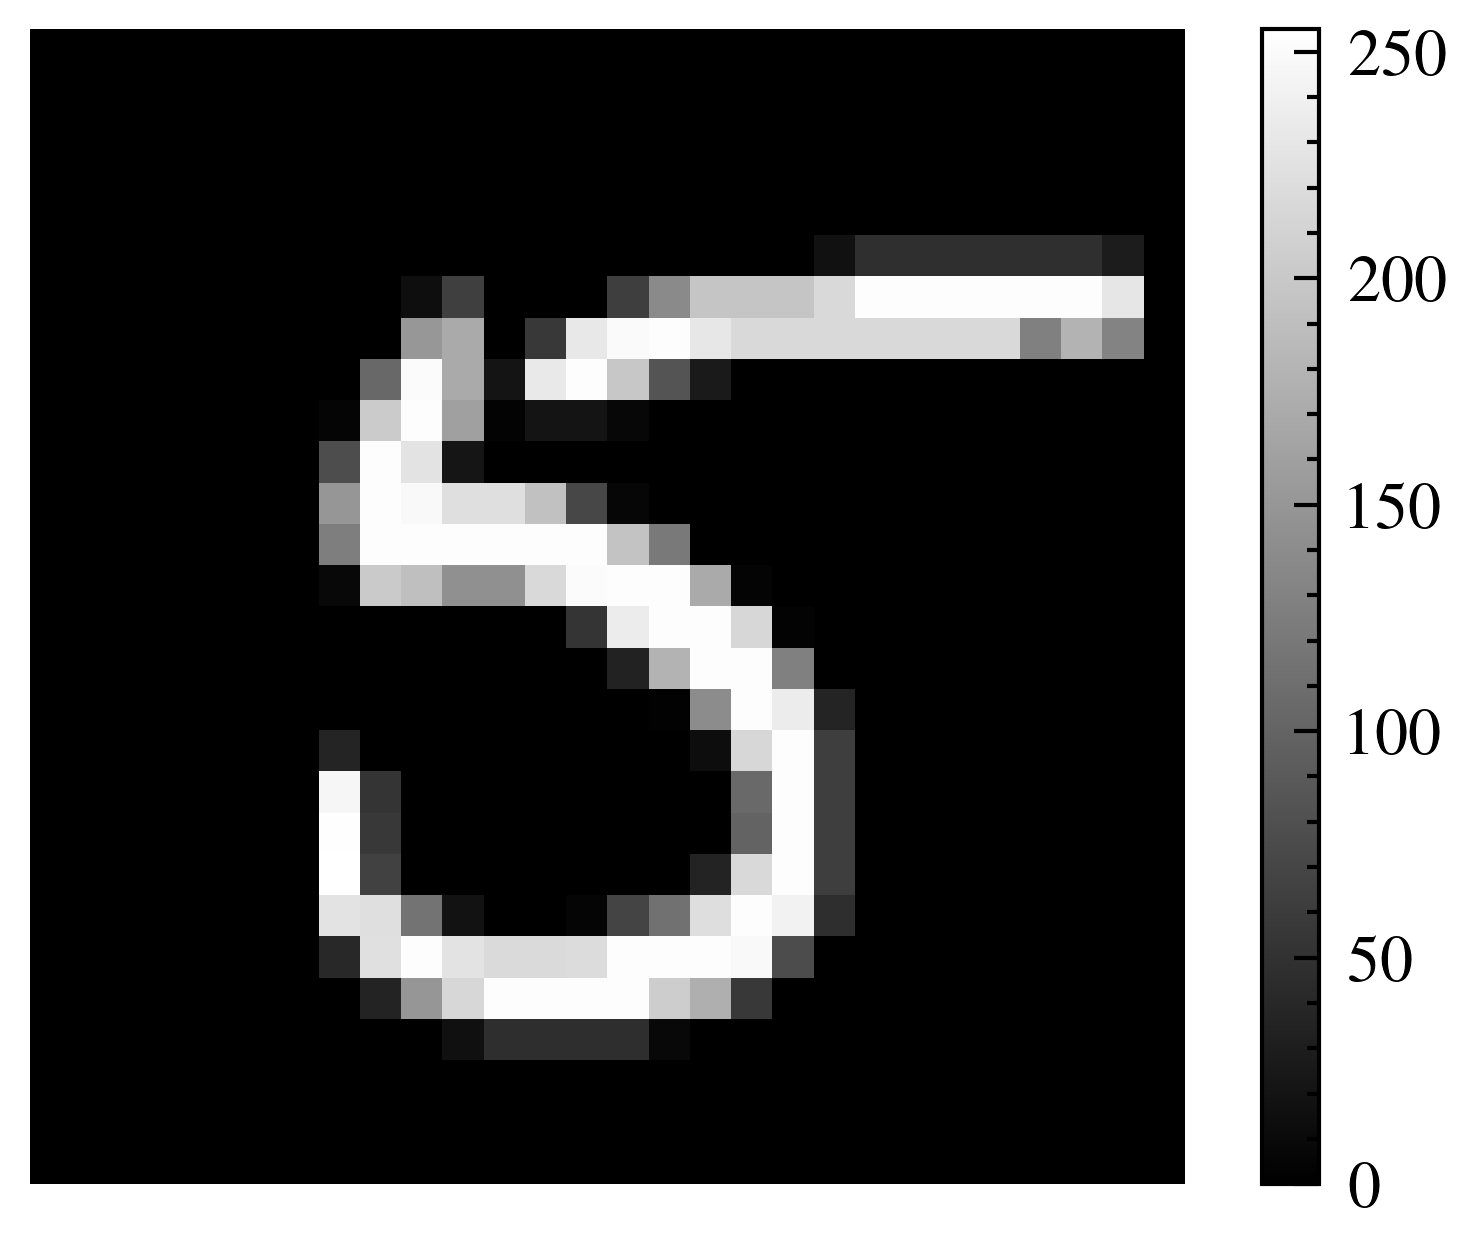

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit_data = X_train[0]
some_digit_image = some_digit_data.reshape(28, 28)

# imshow plots the matrix
plt.imshow(some_digit_image,cmap='gray')
plt.axis("off")
plt.colorbar()
plt.show()

784

69

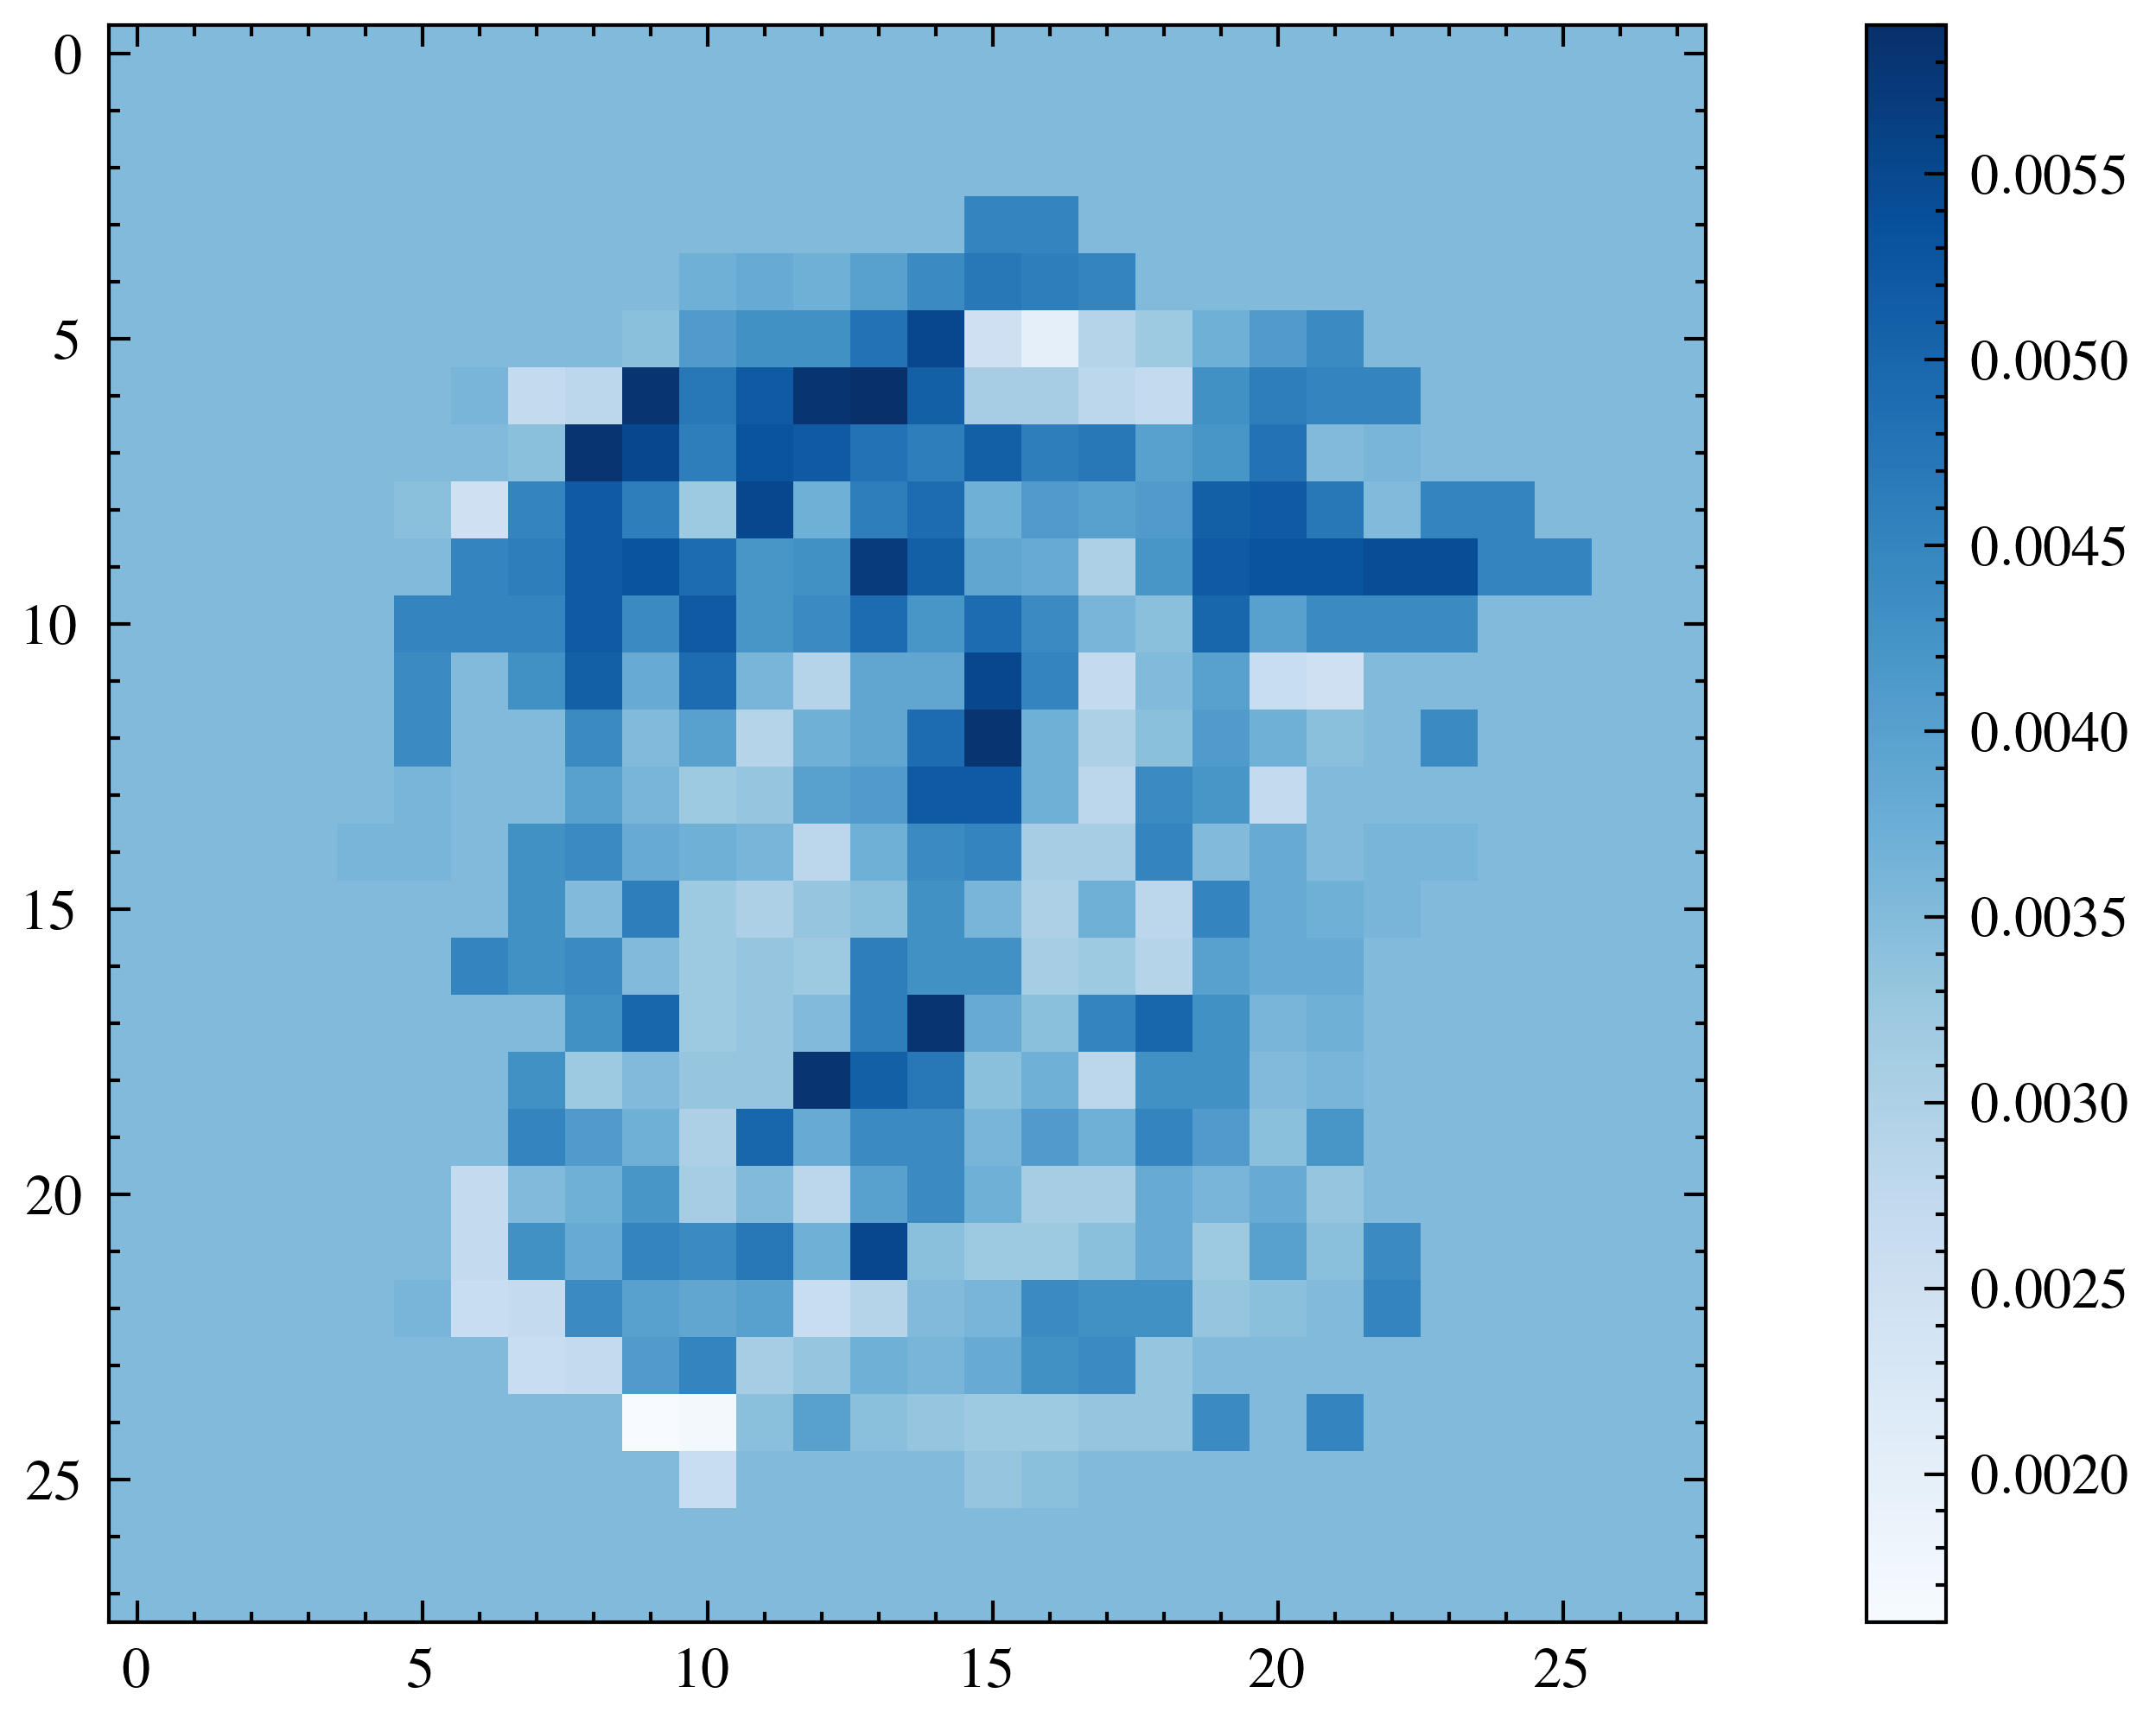

In [41]:
display(len(knn_fi))
fis = np.nonzero(knn_fi)[0]
display(len(fis))
with plt.style.context('science'):
    # imshow plots the matrix
    plt.figure(figsize = (8,4))
    plt.imshow(knn_vi['importances_mean'].reshape(28,28), cmap=plt.cm.Blues)
    plt.colorbar()
    plt.show()

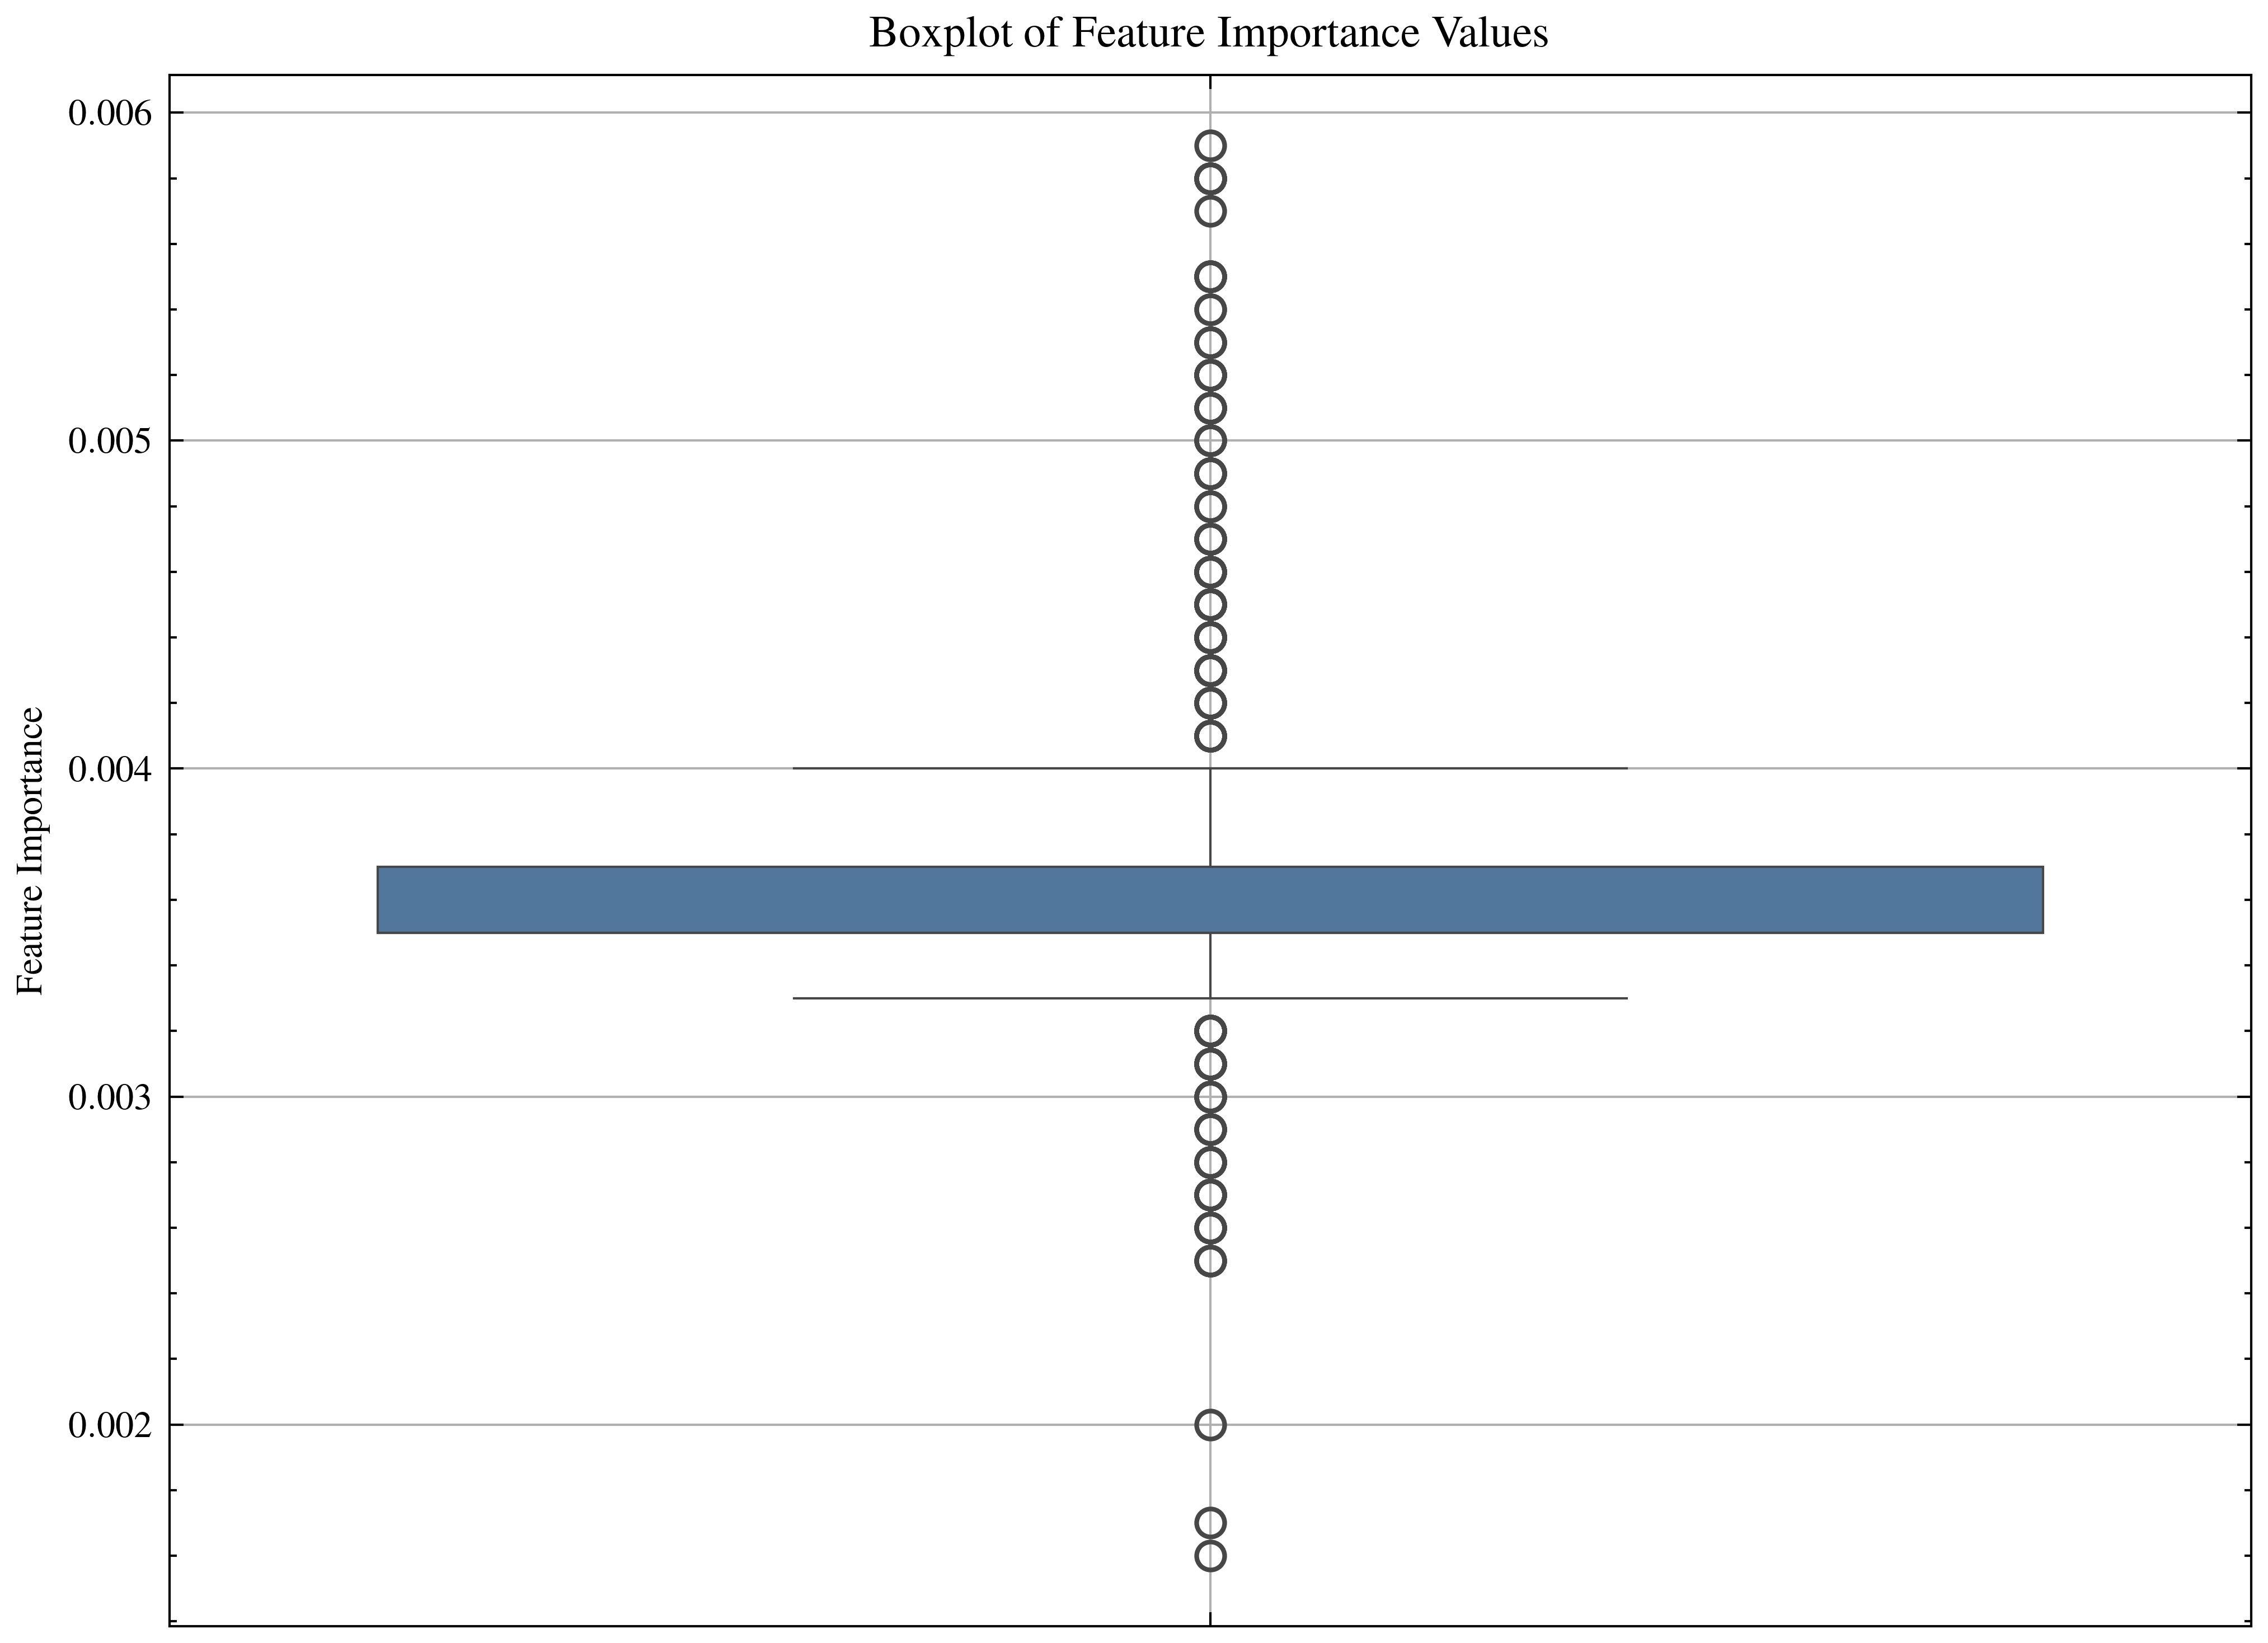

In [44]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(y=knn_vi['importances_mean'], linewidth=0.5, whis=1.5)
plt.title("Boxplot of Feature Importance Values")
plt.ylabel("Feature Importance")
plt.grid(True)
plt.show()


In [45]:
pickle.dump_session('notebook_env.db')


In [87]:
# Fitting different regression models
# Linear Regression
from sklearn.calibration import LinearSVC
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
models = ['KNN', 'Random forest', 'XGBoost',"MLP"]
accuracies = []
numeric_columns = mnist_train.drop(columns=["label"]).columns.tolist()
svm_model = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('scaler', StandardScaler(),  numeric_columns)
    ], remainder='passthrough')),  # 'passthrough' keeps the remaining columns as is
    ('regressor', SVC(kernel='linear'))
])
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)
accuracies.append(accuracy_score(y_test, preds))
print('SVM accuracy:', accuracy_score(y_test, preds))

dnn_model = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('scaler', StandardScaler(), numeric_columns)
    ], remainder='passthrough')),  # 'passthrough' keeps the remaining columns as is
    ('regressor', MLPClassifier(hidden_layer_sizes=(100)))
])
dnn_model.fit(X_train, y_train)
preds = dnn_model.predict(X_test)
accuracies.append(accuracy_score(y_test, preds))
print('DNN accuracy:', accuracy_score(y_test, preds))

rf_model = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('scaler', StandardScaler(), numeric_columns)
    ], remainder='passthrough')),  # 'passthrough' keeps the remaining columns as is
    ('regressor', RandomForestClassifier())
])
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
accuracies.append(accuracy_score(y_test, preds))
print('RF accuracy:', accuracy_score(y_test, preds))

knn_model = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('scaler', StandardScaler(), numeric_columns)
    ], remainder='passthrough')),  # 'passthrough' keeps the remaining columns as is
    ('regressor', KNeighborsClassifier())
])
knn_model.fit(X_train, y_train)
preds = knn_model.predict(X_test)
accuracies.append(accuracy_score(y_test, preds))
print('KNN accuracy:', accuracy_score(y_test, preds))

xgb_model = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('scaler', StandardScaler(), numeric_columns)
    ], remainder='passthrough')),  # 'passthrough' keeps the remaining columns as is
    ('regressor', XGBClassifier())
])
xgb_model.fit(X_train, y_train)
preds = xgb_model.predict(X_test)
accuracies.append(accuracy_score(y_test, preds))
print('xgb accuracy:', accuracy_score(y_test, preds))

lr_model = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('scaler', StandardScaler(), numeric_columns)
    ], remainder='passthrough')),  # 'passthrough' keeps the remaining columns as is
    ('regressor', LogisticRegression())
])
lr_model.fit(X_train, y_train)
preds = lr_model.predict(X_test)
accuracies.append(accuracy_score(y_test, preds))
print('lr accuracy:', accuracy_score(y_test, preds))


SVM accuracy: 0.9155
DNN accuracy: 0.946
RF accuracy: 0.954
KNN accuracy: 0.91
xgb accuracy: 0.9535
lr accuracy: 0.883


In [88]:
# Example usage with custom colors
models = {
    'XGBoost': xgb_model,
    'Random Forest': rf_model,
    'Multi-Layer Perceptron': dnn_model,
    'Support Vector Machine': svm_model,
    "Logistic Regression":lr_model,
    "k-NN":knn_model,
}

color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
num_colors = 10
custom_colors = color_cycle[:num_colors]
display(custom_colors)
pfi_values = plot_feature_importance_comparison(models, X_test, y_test,custom_colors,X_train,y_train)

['#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377', '#BBBBBB']

In [90]:
import dill as pickle
pickle.dump_session('notebook_env.db')


In [91]:
display(X_train)

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
9254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1561,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1670,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6087,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6669,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5191,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


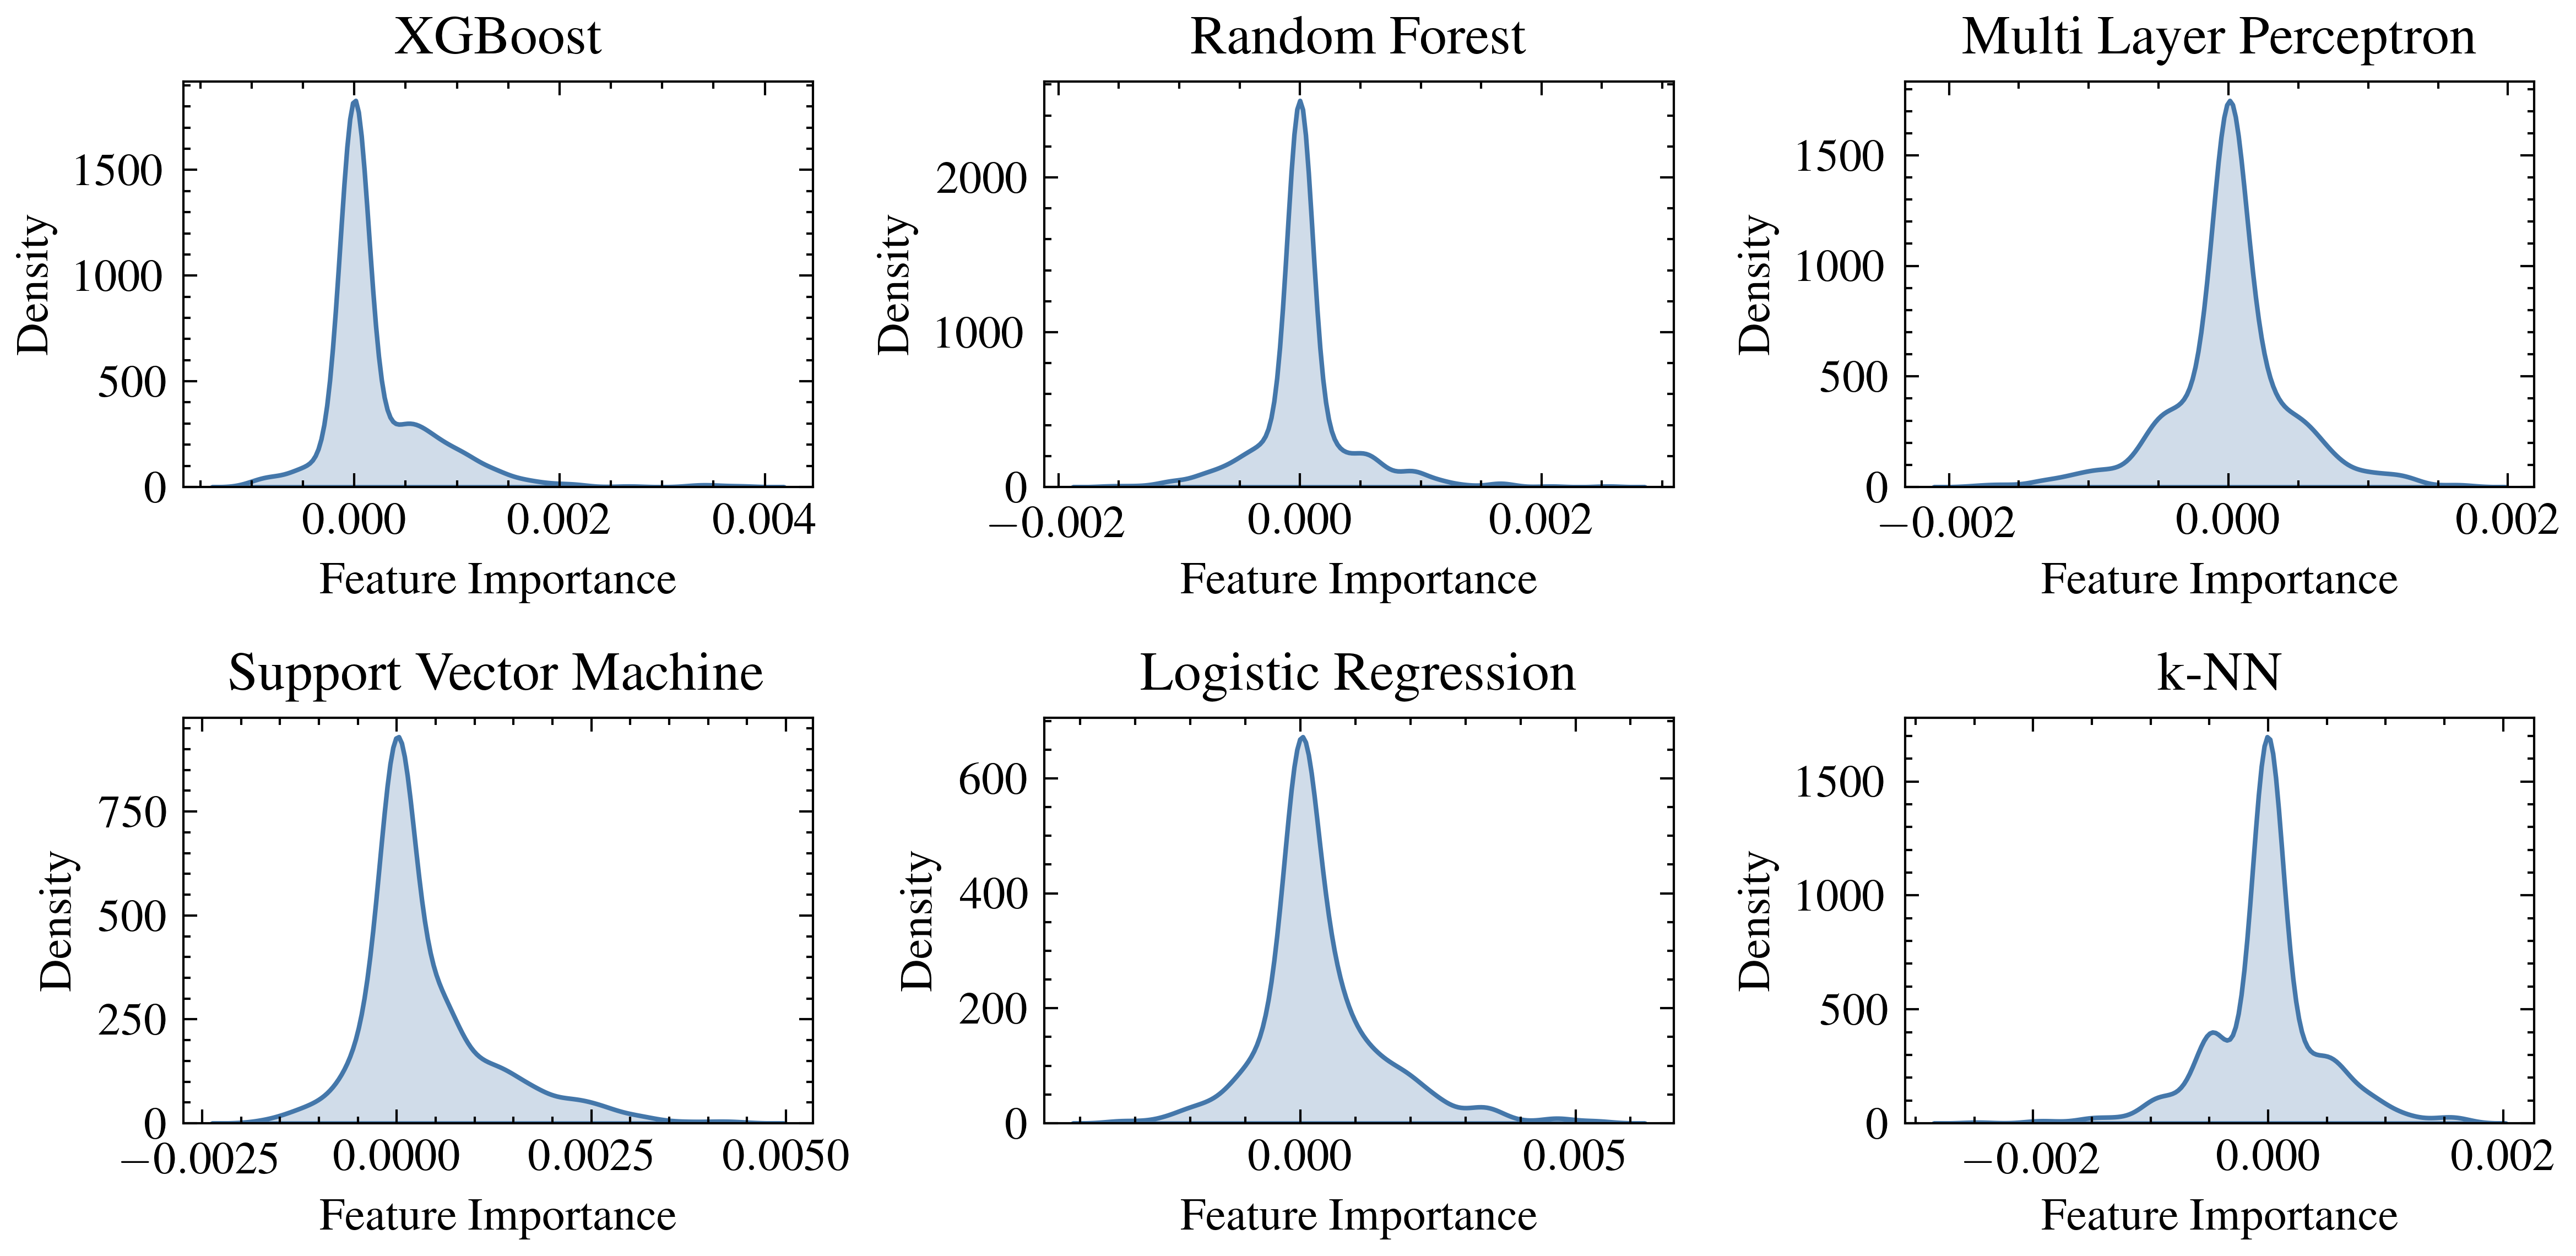

In [92]:
import seaborn as sns

num_models = len(models)
num_rows = 2
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 4))

for i, (model_name, model) in enumerate(models.items()):
    row_idx = i // num_cols
    col_idx = i % num_cols
    with plt.style.context('science'):
        column = pfi_values[0][model_name]  # Get feature importance values for the current model
        sns.kdeplot(column, ax=axes[row_idx, col_idx], label=model_name,shade=True)
        axes[row_idx, col_idx].set_title(model_name)
        axes[row_idx, col_idx].set_xlabel("Feature Importance")
        axes[row_idx, col_idx].set_ylabel("Density")

# Hide empty subplots
for i in range(num_models, num_rows * num_cols):
    axes.flatten()[i].axis('off')

plt.tight_layout()
plt.show()

In [94]:
display(pfi_values[0])

,XGBoost,Random Forest,Multi Layer Perceptron,Support Vector Machine,Logistic Regression,k-NN
1x1,0.0,0.0,0.0,0.0,0.0,0.0
1x2,0.0,0.0,0.0,0.0,0.0,0.0
1x3,0.0,0.0,0.0,0.0,0.0,0.0
1x4,0.0,0.0,0.0,0.0,0.0,0.0
1x5,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
28x24,0.0,0.0,0.0,0.0,0.0,0.0
28x25,0.0,0.0,0.0,0.0,0.0,0.0
28x26,0.0,0.0,0.0,0.0,0.0,0.0
28x27,0.0,0.0,0.0,0.0,0.0,0.0


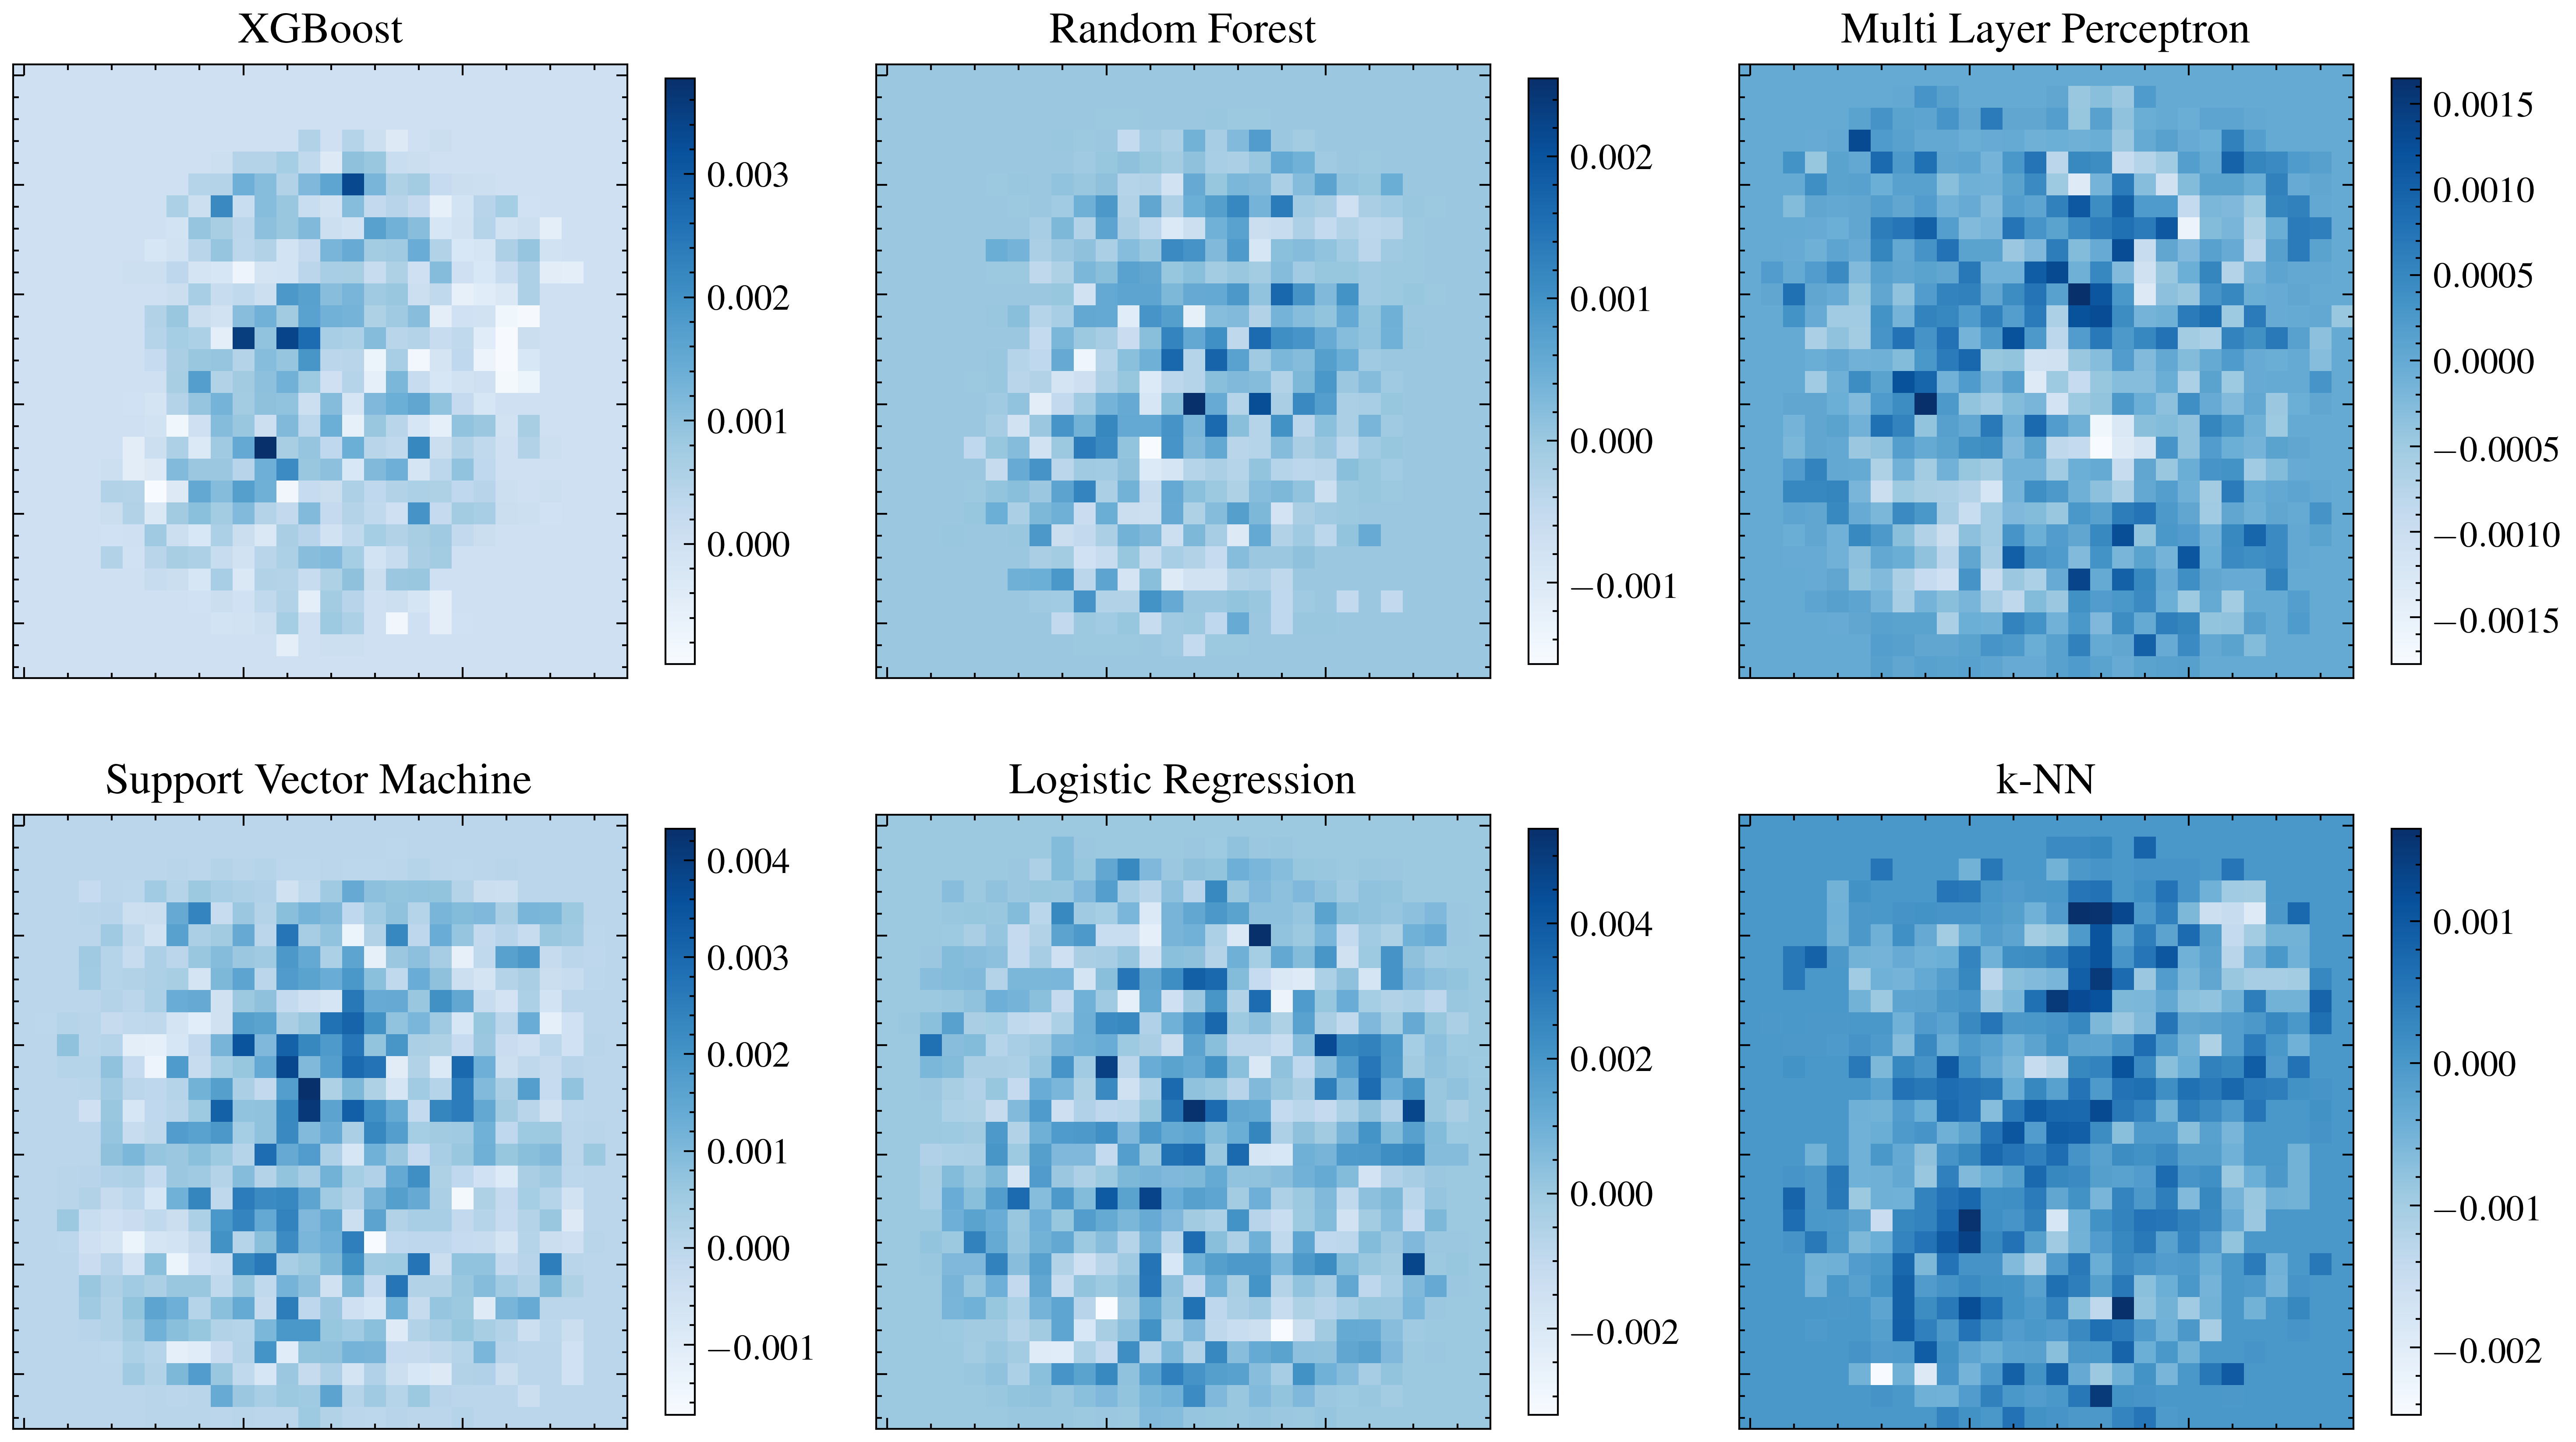

In [124]:
num_models = len(models)
num_rows = 2
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 6))
for i, (model_name, model) in enumerate(models.items()):
    row_idx = i // num_cols
    col_idx = i % num_cols
    with plt.style.context('science'):
        column = np.array(pfi_values[0][model_name])  # Get feature importance values for the current model
        threshold = np.percentile(column, 0)  # Adjust the percentile as needed
        masked_matrix = np.where(column < threshold, 0, column)
        im = axes[row_idx, col_idx].imshow(masked_matrix.reshape(28, 28), cmap='Blues')
        axes[row_idx, col_idx].set_title(model_name)
        axes[row_idx, col_idx].set_xticklabels([])
        axes[row_idx, col_idx].set_yticklabels([])
        axes[row_idx, col_idx].set_ylabel("")
        cbar = plt.colorbar(im, ax=axes[row_idx, col_idx], shrink=0.8)
plt.tight_layout()
plt.show()

['#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377', '#BBBBBB']

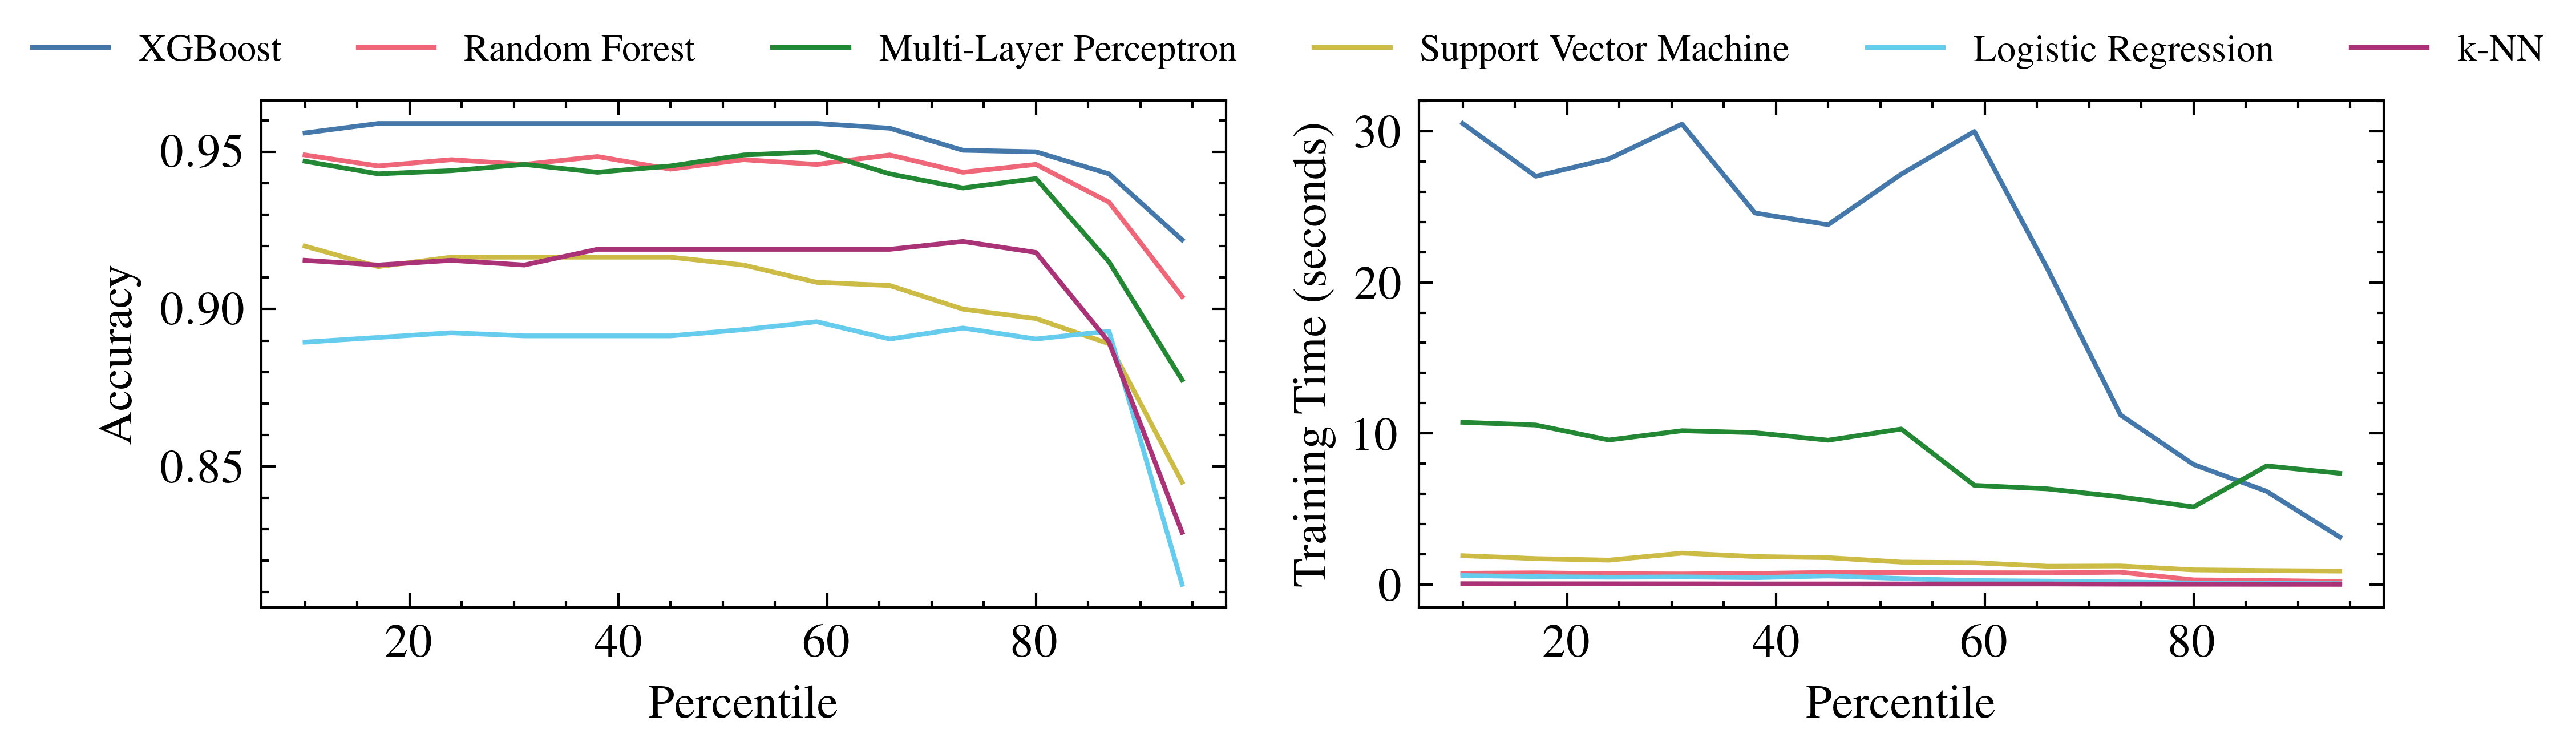

In [134]:
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
num_colors = 10
custom_colors = color_cycle[:num_colors]
with plt.style.context('science'):
    accuracies = {model_name: [] for model_name in models}
    training_times = {model_name: [] for model_name in models}

    percentiles = range(10, 99,7)

    fig, axs = plt.subplots(1, 2, figsize=(8, 2))
    models2 = {
        'XGBoost': XGBClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Multi Layer Perceptron': MLPClassifier(hidden_layer_sizes=(100)),
        'Support Vector Machine': SVC(kernel='linear'),
        "Logistic Regression":LogisticRegression(),
        "k-NN":KNeighborsClassifier(),
    }

    for i, (model_name, model) in enumerate(models2.items()):
        for percentile_val in percentiles:
            # Calculate the threshold for the current percentile
            threshold = np.percentile(pfi_values[0][model_name], percentile_val, axis=0)

            # Identify columns to remove
            columns_to_remove = np.where(pfi_values[0][model_name] < threshold)[0]

            # Remove columns from X_train
            X_train_filtered = np.delete(X_train, columns_to_remove, axis=1)
            X_test_filtered = np.delete(X_test, columns_to_remove, axis=1)
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train_filtered)
            X_test_scaled = scaler.transform(X_test_filtered)
            

            # Train the model
            start_time = time.time()
            model.fit(X_train_scaled, y_train)
            end_time = time.time()

            # Record training time
            training_times[model_name].append(end_time - start_time)

            # Evaluate the model
            accuracy = model.score(X_test_scaled, y_test)

            # Record accuracy
            accuracies[model_name].append(accuracy)
        if model_name == 'Multi Layer Perceptron':
            label = 'Multi-Layer Perceptron'
        else:
            label = model_name
        # Plot accuracies
        axs[0].plot(percentiles, accuracies[model_name], label=label, color=custom_colors[i])

        # Plot training times
        axs[1].plot(percentiles, training_times[model_name], label=label, color=custom_colors[i])

    # Set titles and labels for the plots
    axs[0].set_xlabel('Percentile')
    axs[0].set_ylabel('Accuracy')

    axs[1].set_xlabel('Percentile')
    axs[1].set_ylabel('Training Time (seconds)')
    handles_dict = {}
    for ax in [axs[0],axs[1]]:
        handles_ax, labels_ax = ax.get_legend_handles_labels()
        for handle, label in zip(handles_ax, labels_ax):
            if label not in handles_dict:
                handles_dict[label] = handle

    plt.subplots_adjust(top=0.85)
    unique_handles = list(handles_dict.values())
    unique_labels = list(handles_dict.keys())
    fig.legend(unique_handles, unique_labels, loc='upper center', ncol=6, fontsize=8)
    plt.show()

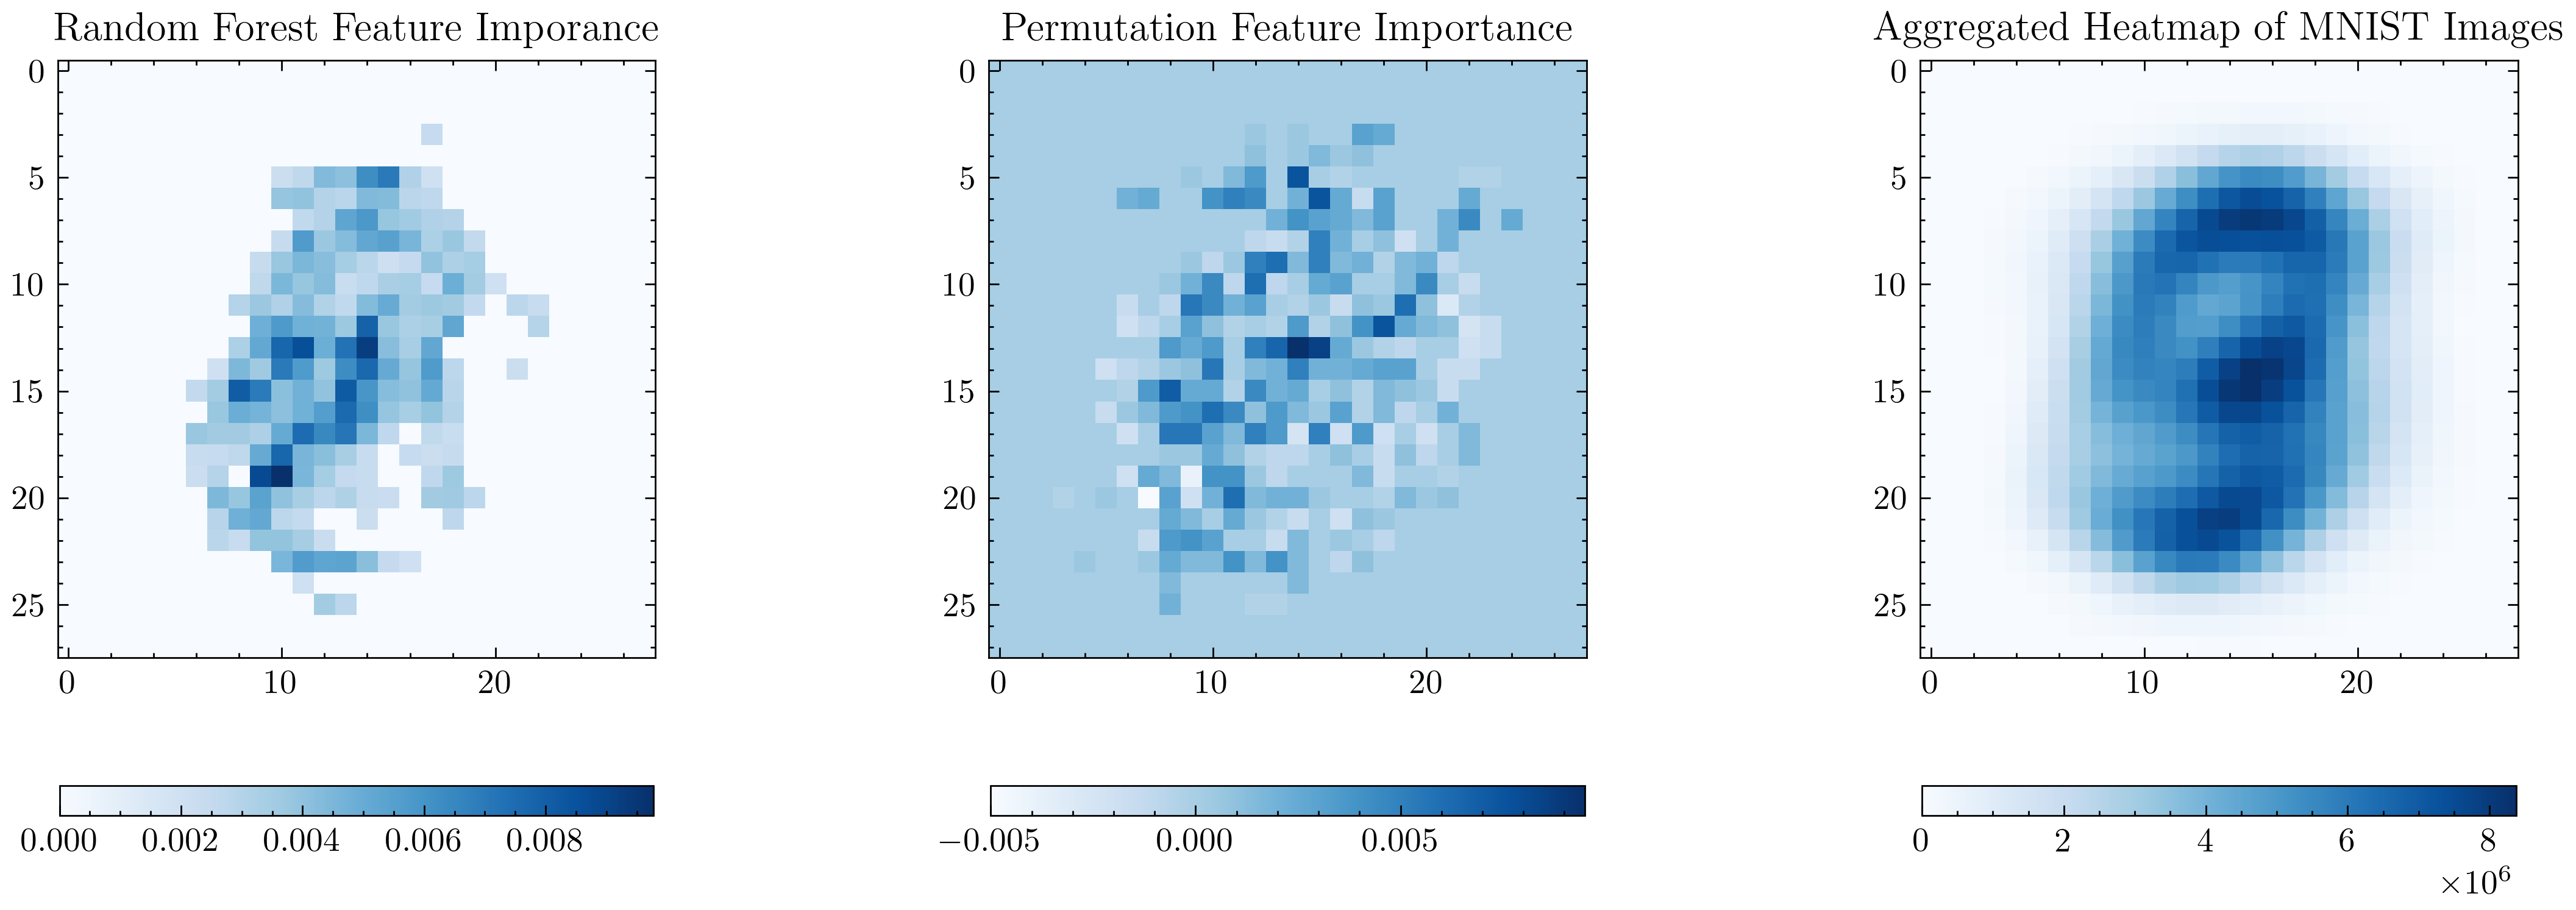

In [40]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit_data = importances
some_digit_image = some_digit_data.reshape(28, 28)

# First Image
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(some_digit_image, cmap=plt.cm.Blues)
plt.title('Random Forest Feature Imporance')
plt.colorbar(location='bottom', shrink=0.6)

# Second Image
plt.subplot(1, 3, 2)
plt.imshow(rf_fi_mean.reshape(28,28), cmap=plt.cm.Blues)
plt.title('Permutation Feature Importance')
plt.colorbar(location='bottom', shrink=0.6)
# Second Image
# Extract pixel values
pixels = mnist_train.iloc[:, 1:].values

# Reshape pixel values into 28x28 matrices
images = pixels.reshape(-1, 28, 28)

# Sum up the pixel values of all images
aggregated_image = np.sum(images, axis=0)

# Plot the aggregated heatmap
plt.subplot(1, 3, 3)
plt.imshow(aggregated_image, cmap='Blues')
plt.title('Aggregated Heatmap of MNIST Images')
plt.colorbar(location='bottom', shrink=0.6)
plt.grid(False)

plt.tight_layout()
plt.show()

In [26]:
%%capture
from sklearn.inspection import PartialDependenceDisplay

# Convert array indices to subplot indices
valid_indices_subplot = np.unravel_index(fis, (28, 28))
fig, axes = plt.subplots(28, 28, figsize=(15, 15))
my_plot = None

for i in range(28):
    for j in range(28):
        index = i * 28 + j
        if (i, j) not in zip(*valid_indices_subplot):
            axes[i, j].axis('off')  
            axes[i, j].text(0.5, 0.5, index, ha='center', va='center', fontsize=14)  
        else:
            disp = PartialDependenceDisplay.from_estimator(rf_reg, X_train,features=[index],target=1, percentiles=(0, 1),n_jobs=-1)
            feature_values = disp.pd_results[0]["values"][0]
            average_predictions = disp.pd_results[0]["average"][1]    
            axes[i, j].plot(feature_values, average_predictions)
            axes[i, j].axis('off')           
my_plot  = fig


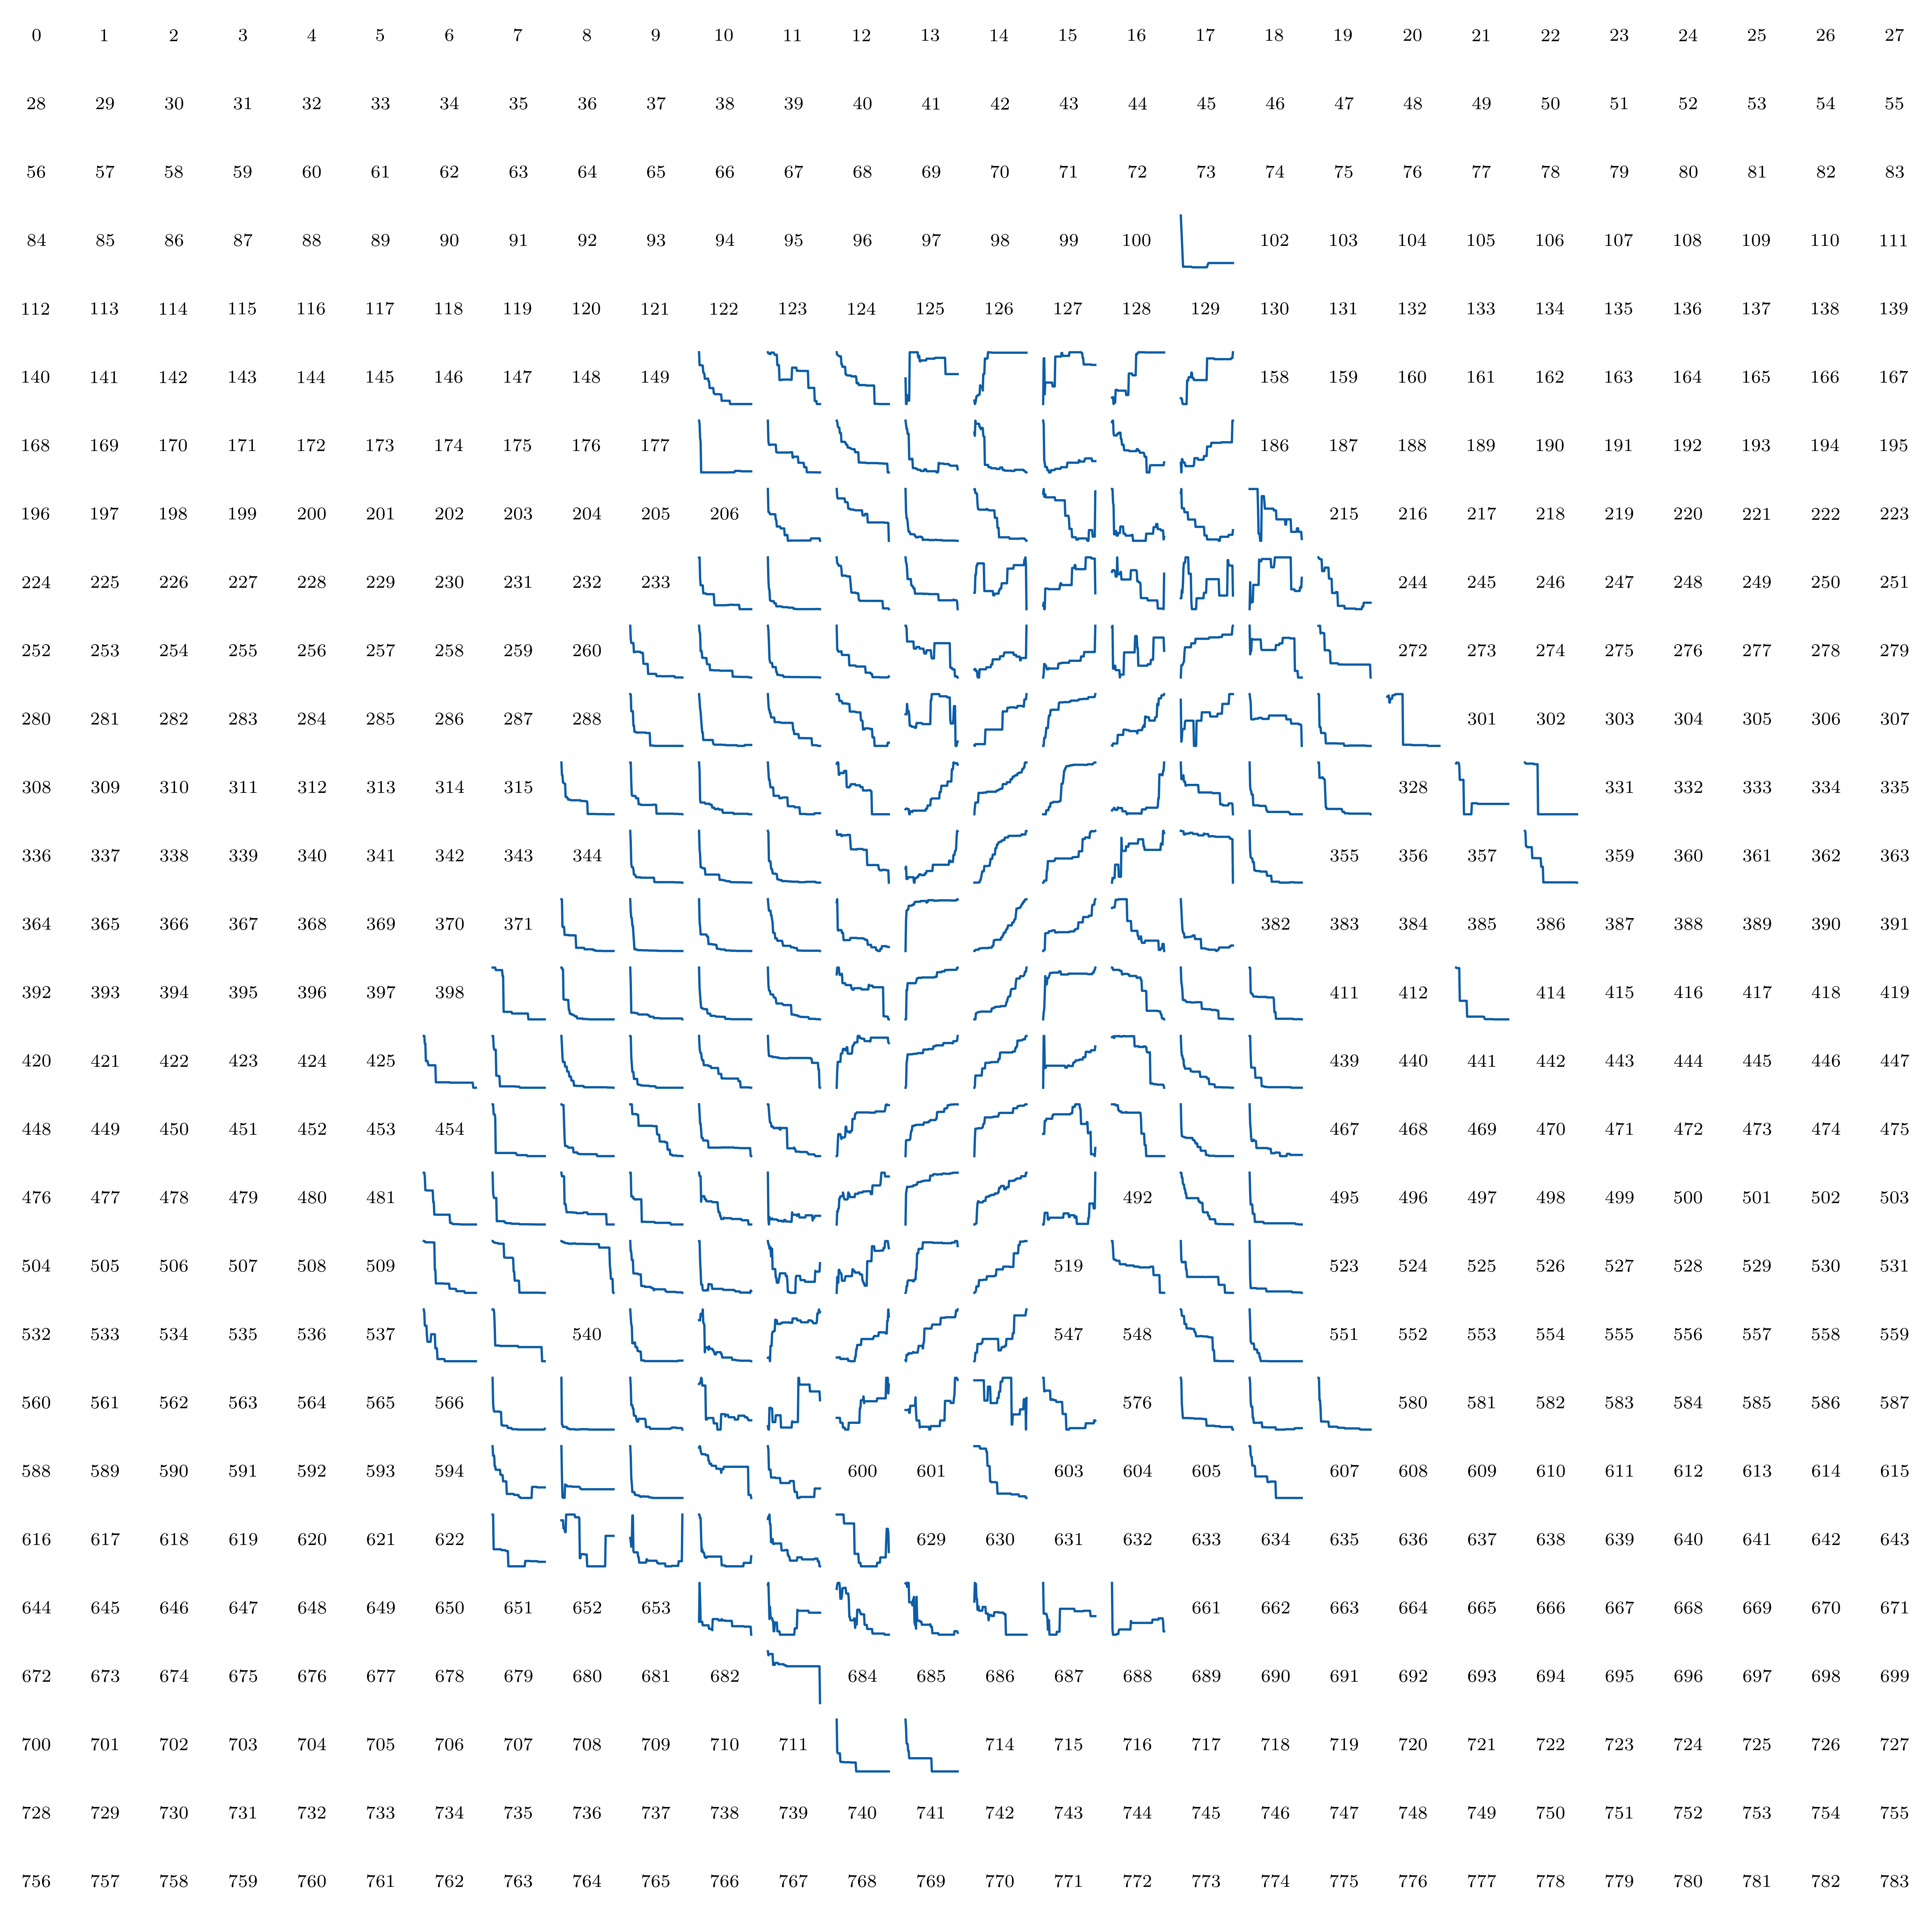

In [27]:
display(my_plot)